## Decision Tree

* 데이터 병합 및 전처리
* Decision Tree 분석
* Feature Importance

### 데이터 병합 및 전처리

In [1]:
# library import
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('../data/merged_data/variables0424.csv')
hash_table = pd.read_csv('../data/acc_id_hash_table.csv')
label = pd.read_csv('../data/final_data_rev/train/train_label.csv')

In [3]:
# merge label and transform_table
merged_hash = df.merge(hash_table, left_on='acc_id', right_on='acc_id')
merged_hash = merged_hash.merge(label, left_on='acc_id', right_on='acc_id')
merged_hash['acc_id'] = merged_hash['hashed']
merged = merged_hash.drop('hashed', axis=1)

In [4]:
# check validation
print(merged.shape)
merged.head()

(100000, 62)


,acc_id,week1_cnt_dt,week2_cnt_dt,week3_cnt_dt,week4_cnt_dt,week5_cnt_dt,week6_cnt_dt,week7_cnt_dt,week8_cnt_dt,total_cnt_dt,...,total_making_cnt,week1_is_connected,week2_is_connected,week3_is_connected,week4_is_connected,week5_is_connected,week6_is_connected,week7_is_connected,week8_is_connected,label
0,BDJK,-0.633771,-0.695061,-0.810572,-0.870099,-0.882377,-0.816841,0.806140,1.482040,-2.420541,...,-2.924292,0,0,0,0,0,0,1,1,week
1,EPPL,0.518100,0.456923,-0.078758,0.605139,0.214888,0.707692,0.065025,-0.527751,1.961259,...,-2.924292,1,1,1,1,1,1,1,1,retained
2,FEEC,-0.633771,-0.695061,-0.078758,-0.132480,-0.150867,-0.816841,-0.676089,0.477144,-2.706722,...,-2.924292,0,0,1,1,1,0,1,1,retained
3,BRWQ,0.518100,-0.695061,1.384870,1.711567,-0.882377,-0.054574,1.547255,0.979592,4.509371,...,-2.924292,1,0,1,1,0,1,1,1,month
4,DDKZ,-0.633771,-0.311066,-0.810572,-0.870099,-0.882377,-0.816841,-1.046647,-1.030198,-6.401571,...,-2.924292,0,1,0,0,0,0,0,1,2month


In [5]:
# re-labeling : retained -> 0 , week -> 1, month/2month -> 1
merged['label'][merged['label'] == 'retained'] = 0
merged['label'][merged['label'] == 'week'] = 1
merged['label'][merged['label'] == 'month'] = 1
merged['label'][merged['label'] == '2month'] = 1
merged['label'] = merged['label'].astype('int')

C:\Users\kelvin\Anaconda3\envs\pet\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kelvin\Anaconda3\envs\pet\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kelvin\Anaconda3\envs\pet\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.

In [6]:
# save as csv file
merged.to_csv('merged_data.csv', index=False)

### train/test 데이터 분할

In [7]:
# 독립변수를 X, 타겟 변수를 y에 할당함
X = merged.iloc[:, 1:-1] #drop acc_id & label
y = merged.iloc[:, -1] # contains label

In [8]:
# test data의 비율을 전체의 0.3으로 두고 train data와 test 데이터를 나눔
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

### Decision Tree 분석

In [9]:
# tree의 max_depth가 1부터 20 사이일 때의 train/test 정확도를 구함
train_test_acc = list()

for i in range(1,20):
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree.fit(X_train, y_train)
    train_test_acc.append({'max_depth':i, 'accuracy':tree.score(X_train, y_train), 'label':'train'})
    train_test_acc.append({'max_depth':i, 'accuracy':tree.score(X_test, y_test), 'label':'test'})
    
train_test_df = pd.DataFrame(train_test_acc)
train_test_df.head()


,accuracy,label,max_depth
0,0.829671,train,1
1,0.828933,test,1
2,0.829671,train,2
3,0.828933,test,2
4,0.839371,train,3


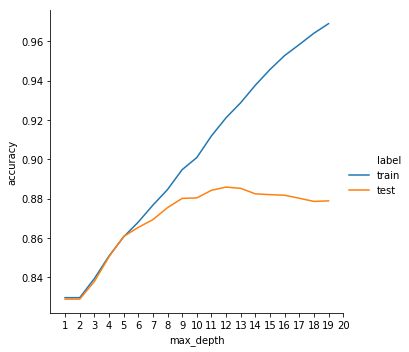

In [20]:
# max_depth의 변화에 따라 train, test 정확도를 그래프로 나타냄
import seaborn as sns

p = sns.relplot(x="max_depth", y="accuracy", hue='label', kind="line", data=train_test_df)
p = p.set(xlim=(0,20),xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

# save as png
p.savefig('train_test_acc.png')

In [17]:
# 최대 test 정확도 출력
maximum_test_acc = train_test_df.groupby('label').accuracy.max().test
print(type(maximum_test_acc))
print(f'최대 test 정확도 : {maximum_test_acc}')

# test 정확도가 최대일 때의 max_depth(최적값)를 구함
optimal_max_depth = train_test_df[train_test_df['accuracy'] == train_test_df.groupby('label').accuracy.max().test]['max_depth'].iloc[0]
print(f'최적 max_depth : {optimal_max_depth}')

<class 'numpy.float64'>
최대 test 정확도 : 0.8858666666666667
최적 max_depth : 12


In [21]:
# 위에서 구한 최적 max_depth를 바탕으로 tree를 만들고 정확도 출력
tree = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
tree.fit(X_train, y_train)

print("train accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print("test accuracy : {:.3f}".format(tree.score(X_test, y_test)))

train accuracy : 0.921
test accuracy : 0.886


In [22]:
# Decision Tree 시각화
# dot 파일로 Tree를 export함
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot',class_names=['retained', 'churned'],feature_names=X.columns, impurity=False, filled=True)

# export한 Tree를 이용하여 시각화하고 pdf로 저장
import graphviz

with open('./tree.dot') as f:
    dot_graph = f.read()

src = graphviz.Source(dot_graph)
display(src)
src.view()

'Source.gv.pdf'

### Feature Importance

In [23]:
# get feature importance & visualize
def plot_feature_importance(model):
    n_features = X.shape[1] # 특징들의 갯수를 저장함
    plt.figure(figsize=(20,20)) # 그래프를 그릴 종이 크기 설정
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)
    plt.savefig('feature_importance.png')
    

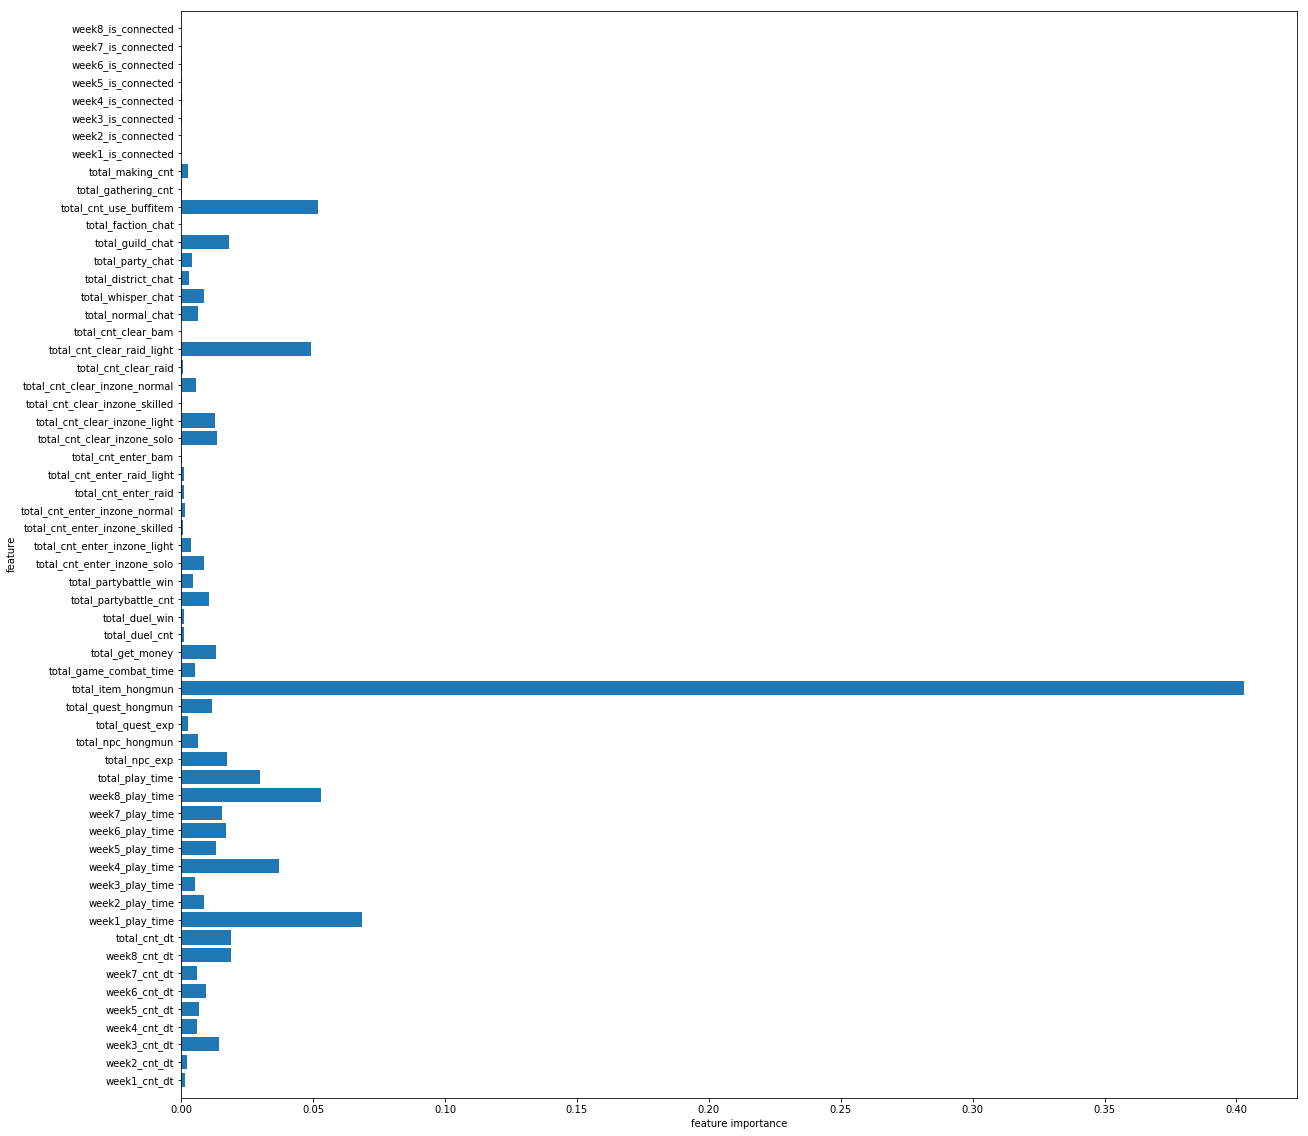

In [24]:
plot_feature_importance(tree)